In [20]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [21]:
# importing the dataset

df = sns.load_dataset('iris')
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


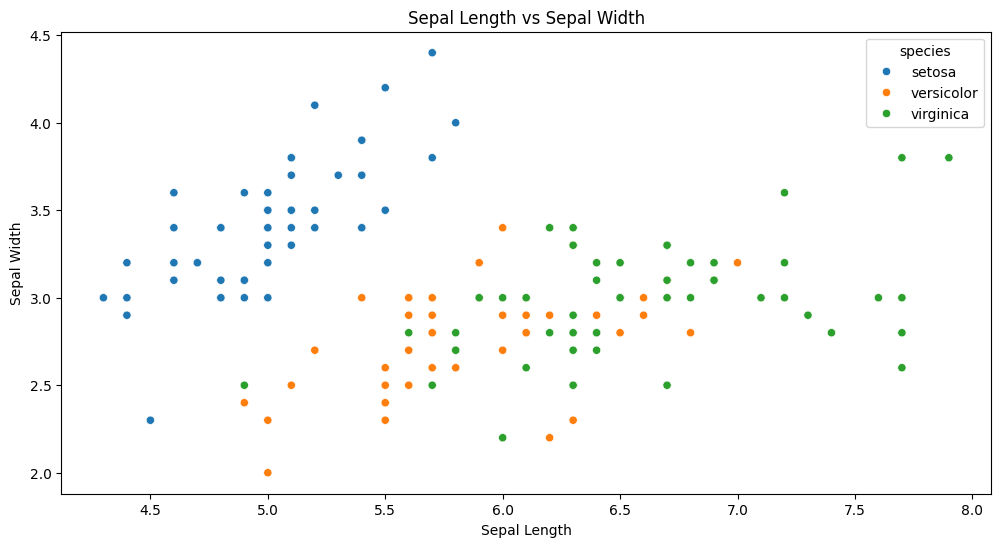

In [22]:
# plotting the scatter plot for sepal_length and sepal_width
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [23]:
# splitting the data into X and y

X = df.drop('species', axis=1)
y = df['species']

# encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)
    
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
%%time

# fitting the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predicting the test data
y_pred = dt.predict(X_test)

# evaluating the model
print(accuracy_score(y_test, y_pred))   
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))


1.0
1.0
1.0
1.0
CPU times: total: 31.2 ms
Wall time: 38 ms


In [25]:
%%time

# fitting the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predicting the test data
y_pred = rf.predict(X_test)

# evaluating the model
print(accuracy_score(y_test, y_pred))   
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))



1.0
1.0
1.0
1.0
CPU times: total: 391 ms
Wall time: 624 ms


In [26]:
%%time

# fitting the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predicting the test data
y_pred = xgb.predict(X_test)

# evaluating the model
print(accuracy_score(y_test, y_pred))   
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

1.0
1.0
1.0
1.0
CPU times: total: 141 ms
Wall time: 387 ms


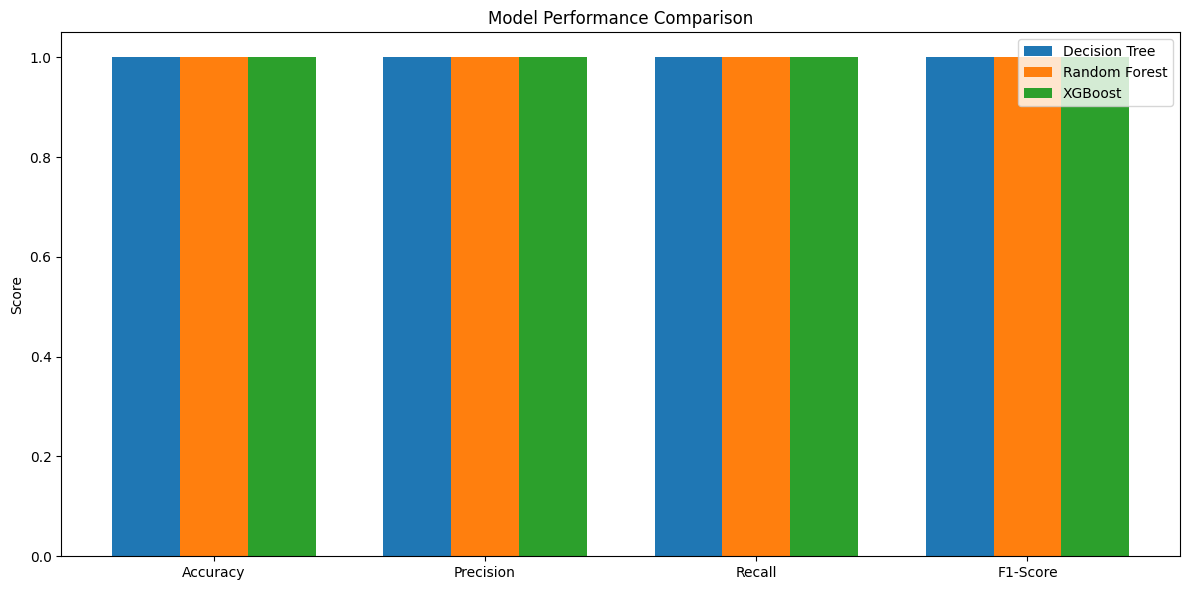

In [28]:
# plotting a bar plot showing each of the metrics for each model
models = ['Decision Tree', 'Random Forest', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Assuming the metrics are stored in variables for each model
dt_metrics = [accuracy_score(y_test, dt.predict(X_test)),
              precision_score(y_test, dt.predict(X_test), average='micro'),
              recall_score(y_test, dt.predict(X_test), average='micro'),
              f1_score(y_test, dt.predict(X_test), average='micro')]

rf_metrics = [accuracy_score(y_test, rf.predict(X_test)),
              precision_score(y_test, rf.predict(X_test), average='micro'),
              recall_score(y_test, rf.predict(X_test), average='micro'),
              f1_score(y_test, rf.predict(X_test), average='micro')]

xgb_metrics = [accuracy_score(y_test, xgb.predict(X_test)),
               precision_score(y_test, xgb.predict(X_test), average='micro'),
               recall_score(y_test, xgb.predict(X_test), average='micro'),
               f1_score(y_test, xgb.predict(X_test), average='micro')]

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.25

ax.bar(x - width, dt_metrics, width, label='Decision Tree')
ax.bar(x, rf_metrics, width, label='Random Forest')
ax.bar(x + width, xgb_metrics, width, label='XGBoost')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()


In [30]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
# splitting the data into X and y

X = df.drop('cut', axis=1)
y = df['cut']

# encoding the input variable
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
%%time

# fitting the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predicting the test data
y_pred = dt.predict(X_test)

# evaluating the model
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.7157953281423804
0.7157953281423804
0.7157953281423804
0.7157953281423804
CPU times: total: 984 ms
Wall time: 1.13 s


In [37]:
%%time

# fitting the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predicting the test data
y_pred = rf.predict(X_test)

# evaluating the model
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))


0.7867074527252503
0.7867074527252503
0.7867074527252503
0.7867074527252503
CPU times: total: 20.5 s
Wall time: 24.5 s


In [38]:
%%time

# fitting the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predicting the test data
y_pred = xgb.predict(X_test)

# evaluating the model
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))


0.8056173526140156
0.8056173526140156
0.8056173526140156
0.8056173526140156
CPU times: total: 7.91 s
Wall time: 4.1 s


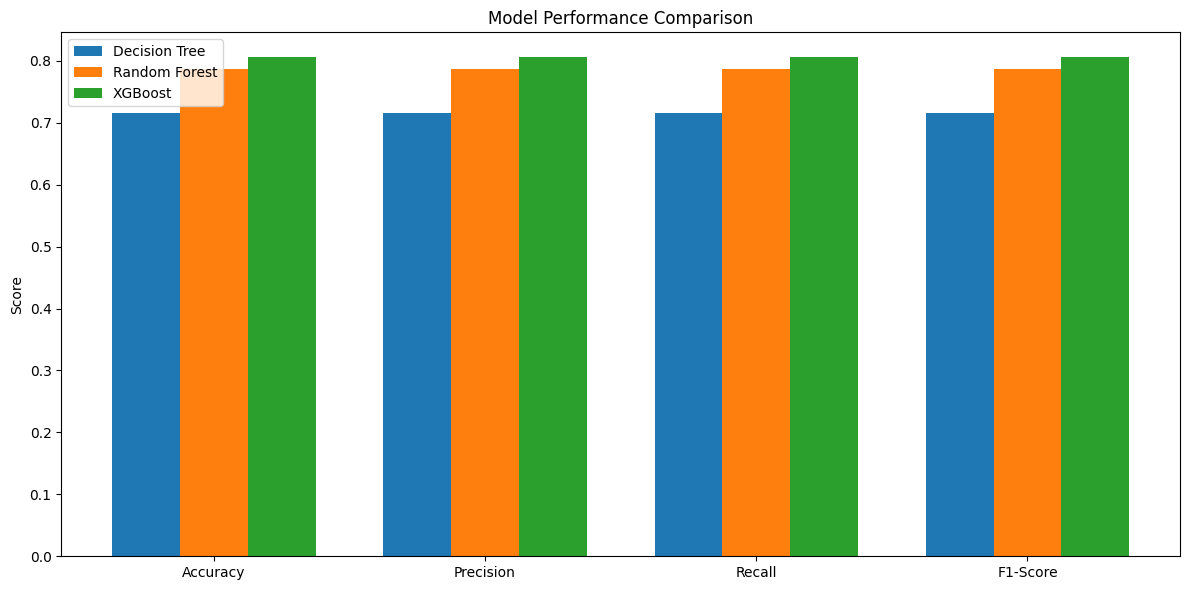

In [39]:
# plotting a bar plot showing each of the metrics for each model
models = ['Decision Tree', 'Random Forest', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Assuming the metrics are stored in variables for each model
dt_metrics = [accuracy_score(y_test, dt.predict(X_test)),
              precision_score(y_test, dt.predict(X_test), average='micro'),
              recall_score(y_test, dt.predict(X_test), average='micro'),
              f1_score(y_test, dt.predict(X_test), average='micro')]

rf_metrics = [accuracy_score(y_test, rf.predict(X_test)),
              precision_score(y_test, rf.predict(X_test), average='micro'),
              recall_score(y_test, rf.predict(X_test), average='micro'),
              f1_score(y_test, rf.predict(X_test), average='micro')]

xgb_metrics = [accuracy_score(y_test, xgb.predict(X_test)),
               precision_score(y_test, xgb.predict(X_test), average='micro'),
               recall_score(y_test, xgb.predict(X_test), average='micro'),
               f1_score(y_test, xgb.predict(X_test), average='micro')]

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.25

ax.bar(x - width, dt_metrics, width, label='Decision Tree')
ax.bar(x, rf_metrics, width, label='Random Forest')
ax.bar(x + width, xgb_metrics, width, label='XGBoost')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()
